In [1]:
import pandas
from seaborn import scatterplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [3]:
stock_info

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


In [4]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [5]:
x

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [6]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=432,test_size=0.15,shuffle=True)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=145,test_size=0.2,shuffle=True)

In [8]:
print(len(x_train),len(x_test),len(x_val))

6896 973 244


In [9]:
x_train=x_train.apply(lambda col: col.fillna(col.mean()))
x_test=x_test.apply(lambda col: col.fillna(col.mean()))
x_val=x_val.apply(lambda col: col.fillna(col.mean()))
y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [10]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

In [11]:
forest=RandomForestRegressor(n_estimators=200,max_depth=10)

In [12]:
forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [13]:
y_predict=forest.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: xlabel='Price_Change'>

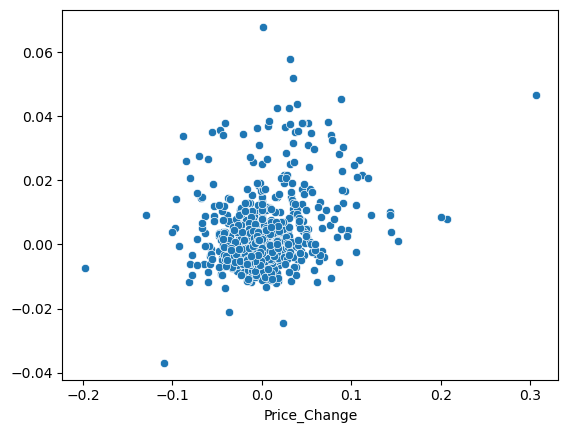

In [14]:
scatterplot(x=y_test,y=y_predict)

In [15]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.03377889923670753

Sensitivity Analysis for n_estimators and max depth

In [16]:
errors=[]
minimum_depth_errors=[]
minimum_depths=[]
for k in list(range(100,200))[::25]:
    for j in list(range(1,25)[::2]):
        forest=RandomForestRegressor(n_estimators=k,max_depth=j)
        forest.fit(x_train,y_train)
        y_predict=forest.predict(x_test.values)
        error=(mean_squared_error(y_test,y_predict)**.5)*100
        errors.append(error)
    minimum_depth_errors.append(min(errors))
    minimum_depths.append(int(errors.index(min(errors)))*2+1)
    errors=[]

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: U

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [17]:
depth=int(minimum_depths[minimum_depth_errors.index(min(minimum_depth_errors))])*2+1
estimator=minimum_depth_errors.index(min(minimum_depth_errors))*25+100
min_error=min(minimum_depth_errors)
print("An Estimator value of "+str(estimator)+" and a Max Depth of "+str(depth)+" yields the lowest stanadrd error of "+str(min_error)+"%.")

An Estimator value of 125 and a Max Depth of 19 yields the lowest stanadrd error of 3.3507760092764585%.


A dual sensitivity analysis shows the optimal combination of max depth and estimatorsused in the random forest regression model. This yields an optimal standard error which is slightly below that of K nearest neighbor, but still has an error well above the goal.

Final Evaluation of Model

In [18]:
forest=RandomForestRegressor(n_estimators=estimator,max_depth=depth)
forest.fit(x_train,y_train)
y_evaluation=forest.predict(x_val.values)
error=(mean_squared_error(y_val,y_evaluation)**.5)*100

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [19]:
print(error)

3.559605478618437


95% Confidence interval for error

In [20]:
print((-1.96*error),(1.96*error))

-6.976826738092136 6.976826738092136
